# <span style="color:; background-color:DarkOliveGreen;"> Interpola√ß√£o Param√©trica de Margens Foliares com Splines </span>
Brisa do Nascimento Barbosa e Mateus Krause Eleot√©rio

O presente trabalho visa aplicar um m√©todo de interpola√ß√£o de pontos, obtidos automaticamente por meio de vis√£o computacional, para extrair o contorno de uma folha. Folhas s√£o um dos mais importantes √≥rg√£os estruturais e funcionais das plantas, e as modelar computacionalmente √© importante para o estudo de diversos problemas, de forma que esse abordagem √© fundamental para diversas aplica√ß√µes, como a an√°lise da can√≥pia, que se refere √† cobertura formada pelas copas das plantas em uma determinada √°rea, influenciando diretamente a intercepta√ß√£o da luz, a troca de gases e os processos ecol√≥gicos associados. Folhas s√£o um dos mais importantes √≥rg√£os estruturais e funcionais das plantas, e as modelar folhas computacionalmente √© importante para o estudo de diversos problemas, como: An√°lise morfom√©trica das plantas; Reconstru√ß√£o 3D da cobertura formada por copas de √°rvores; Estimar quantidade de luz que atravessa copas de √°rvores; Simular distribui√ß√£o de √°gua e luz nas folhas; Modelar res√≠duos de pesticidas na superficie foliar; An√°lise de crescimento e resposta das plantas; Entre outras.

Existem diversas t√©cnicas para a reconstru√ß√£o de folhas (e plantas como um todo), por√©m aplicadas √† reconstru√ß√£o 3D para usos como jogos digitais, por exemplo. Embora sejam representa√ß√µes realistas, deixam a desejar no quesito acur√°cia. Para aplica√ß√µes que demandam simula√ß√µes de ambiente, por exemplo, s√£o necess√°rios modelos extremamente precisos, extra√≠dos de fontes reais. A reconstru√ß√£o 3D da can√≥pia vegetal, por exemplo, √© fundamental para a modelagem funcional-estrutural de plantas (Functional-Structural Plant Modeling - FSPM), permitindo simular a distribui√ß√£o e an√°lise da luz dentro das copas das plantas. A reconstru√ß√£o superficial de plantas contribui para a compreens√£o detalhada da arquitetura vegetal, o que √© crucial para estudos de ecologia, fisiologia e melhoramento vegetal.

Com essa abordagem inicial de modelagem por splines, podemos gerar representa√ß√µes precisas do contorno foliar, que servem como base para an√°lises mais avan√ßadas, al√©m de facilitar a integra√ß√£o com t√©cnicas de vis√£o computacional e modelagem funcional para o estudo aprofundado da din√¢mica das plantas.

Existem diversas t√©cnicas para a reconstru√ß√£o de folhas (e plantas como um todo), por√©m aplicadas √† reconstru√ß√£o 3D para usos como jogos digitais, por exemplo. Embora sejam representa√ß√µes realistas, deixam a desejar no quesito acur√°cia. Para aplica√ß√µes que demandam simula√ß√µes de ambiente, por exemplo, s√£o necess√°rios modelos extremamente precisos, extra√≠dos de fontes reais.

### Escopo

Este documento se motiva do artigo "[A Leaf Modeling and Multi-Scale Remeshing Method for Visual Computation via Hierarchical Parametric Vein and Margin Representation](https://www.frontiersin.org/journals/plant-science/articles/10.3389/fpls.2018.00783/full)", em que √© aplicado a t√©cnica de reconstru√ß√£o de superf√≠cies de plantas para a modelagem estrutural funcional delas. A abordagem utilizada pode ser descrita com os seguintes passos:

- Aquisi√ß√£o de dados: Dada uma folha real, t√©cnicas como Scan 3D com pr√©-processamento s√£o utilizadas;
- Extra√ß√£o de caracter√≠sticas: Selecionar de forma hier√°rquica pontos importantes que definem o esqueleto da planta, formado por veias e margens, conectando-as com B-Splines;
- Modelagem param√©trica de superf√≠cie: Criar uma superf√≠cie auxiliar utilizando NURBS definida pelas curvas geradas anteriormente;
- Reamostragem e gera√ß√£o de malha: Pontos importantes s√£o extra√≠dos das curvas e o modelo de superf√≠cie, gerando uma malha a partir dessa extra√ß√£o;
- Otimiza√ß√£o da malha: Gerar diferentes resolu√ß√µes para a malha, com o objetivo de equilibrar efici√™ncia computacional e preserva√ß√£o de detalhes.

![img](https://www.frontiersin.org/files/Articles/276320/fpls-09-00783-HTML/image_m/fpls-09-00783-g001.jpg)

Aqui daremos foco √†s duas primeiras etapas, de uma forma simplificada, com potencial de expans√£o para futuras pesquisas, incluindo a identifica√ß√£o autom√°tica do sistema vascular das folhas, an√°lise ecol√≥gica considerando par√¢metros como luz, intera√ß√£o funcional com insetos, e caracter√≠sticas fisiol√≥gicas

- Aquisi√ß√£o de dados: Dada a imagem de uma folha real, aplicaremos algoritmos de vis√£o computacional para extrair key-points das margens;
- Extra√ß√£o de caracter√≠sticas: Resolveremos o problema de interpola√ß√£o com uma curva B-Spline peri√≥dica (fechada e cont√≠nua) com os key-points das margen

Mesmo simplificado, teremos uma base de estudo para a resolu√ß√£o do problema de modelagem de folhas.

# <span style="color:; background-color:OliveDrab;">  Aquisi√ß√£o de Dados </span>

## <span style="color:; background-color:#366e3b;"> Modelo 2D</span>

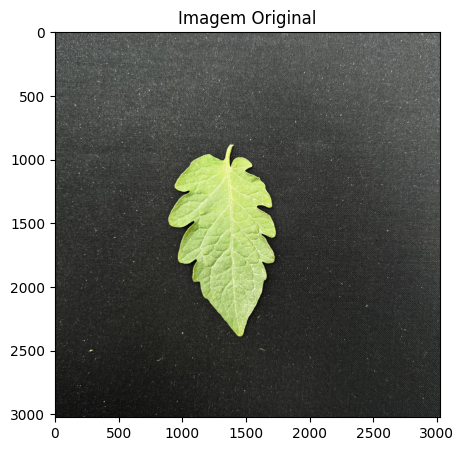

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.mplot3d import Axes3D

url = "https://raw.githubusercontent.com/mateuskrause/tp-aln/main/DATASET/exemplar_05.JPG"
resp = requests.get(url)
img = np.array(Image.open(BytesIO(resp.content)).convert("RGB"))

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("Imagem Original")
plt.show()

A imagem original est√° no formato **RGB** (Red, Green, Blue), que √© √≥timo para exibi√ß√£o em telas, mas nem sempre √© o mais eficiente para segmenta√ß√£o.

Para segmentar cores espec√≠ficas (como o verde da folha), utilizamos o modelo de cores **HSV**:

- *H (Hue / Matiz)*: Representa a **cor** propriamente dita (0 a 180 no OpenCV).
- *S (Saturation / Satura√ß√£o)*: Representa o qu√£o "viva" √© a cor. Cores mais acinzentadas t√™m satura√ß√£o baixa.
- *V (Value / Valor)*: Representa o brilho da cor.

O espa√ßo HSV facilita muito a cria√ß√£o de **m√°scaras baseadas em cor**, pois conseguimos isolar apenas o tom de verde, independentemente da ilumina√ß√£o. Da√≠, podemos segmentar a cor da folha utilizando intervalos de valores de matiz (Hue), satura√ß√£o e brilho.

Queremos isolar <span style="color:; background-color:SeaGreen;"> tons de verde</span>, ent√£o definimos um intervalo de valores que representam o verde comum:

- Hue: entre 40 e 100 (aproximadamente verde amarelado at√© verde azulado)
- Satura√ß√£o e Valor: usamos limites abertos para incluir tons claros e escuros

Usamos `cv2.inRange()` para criar m√°scara bin√°ria (1 onde est√° verde).  

Depois, aplicamos **opera√ß√µes morfol√≥gicas** para limpar ru√≠dos:

- `morphologyEx(..., MORPH_CLOSE)` preenche pequenos buracos na m√°scara.

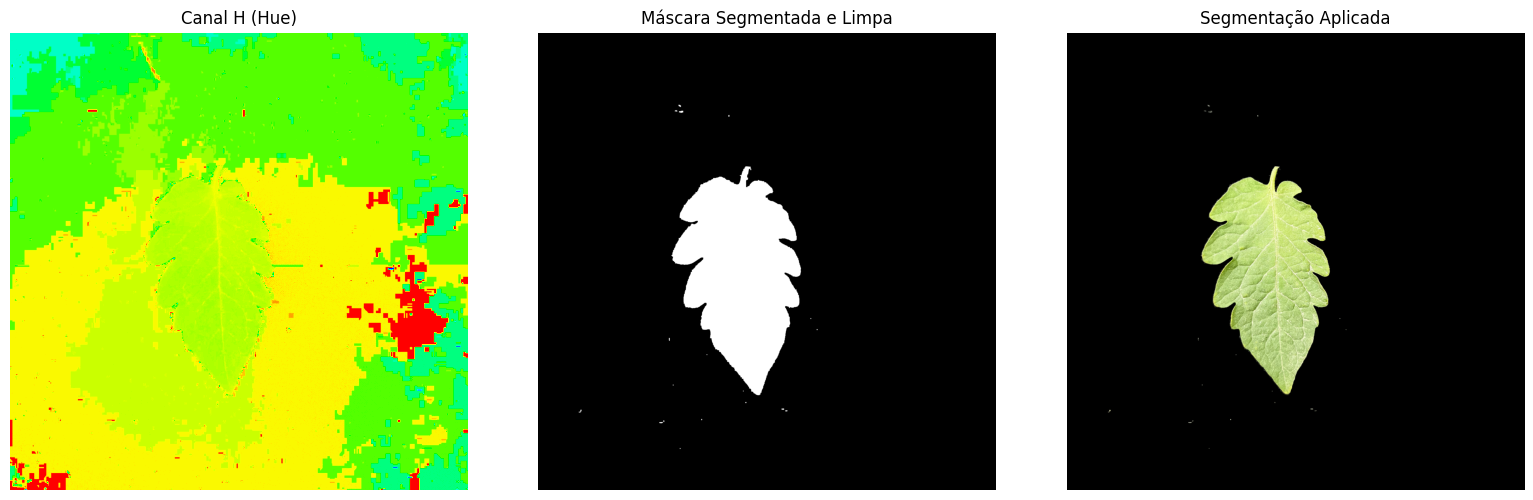

In [29]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_OPEN, kernel, iterations=1)

# Aplicar m√°scara na imagem original
masked_img = cv2.bitwise_and(img, img, mask=mask_clean)

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].imshow(hsv[:, :, 0], cmap='hsv')
axs[0].set_title("Canal H (Hue)")
axs[1].imshow(mask_clean, cmap='gray')
axs[1].set_title("M√°scara Segmentada e Limpa")
axs[2].imshow(masked_img)
axs[2].set_title("Segmenta√ß√£o Aplicada")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

ìáº Identificamos o maior contorno da imagem segmentada, que ser√° usado para an√°lise de curvatura. Tamb√©m garantimos que o contorno seja fechado. 

ìáº Usamos derivadas suavizadas com filtro Gaussiano para calcular a curvatura ao longo do contorno. Isso reduz o ru√≠do e facilita a detec√ß√£o de pontos significativos.

In [30]:
# Encontra os contornos externos na m√°scara e pega o maior contorno
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea).squeeze()
contour_closed = np.vstack([contour, contour[0]])

def smooth_derivative(signal, sigma=3.0):
    smoothed = gaussian_filter1d(signal, sigma, axis=0)  # suaviza√ß√£o com filtro Gaussiano
    grad = np.gradient(smoothed, axis=0)  # gradiente
    return grad

# Calcula a primeira derivada (dx, dy) dos pontos do contorno suavizado
dx = smooth_derivative(contour_closed[:, 0].astype(float))
dy = smooth_derivative(contour_closed[:, 1].astype(float))

# Calcula a segunda derivada (d¬≤x, d¬≤y)
d2x = smooth_derivative(dx)
d2y = smooth_derivative(dy)

# Calcula a curvatura em cada ponto do contorno usando a f√≥rmula cl√°ssica de curvatura 2D
curvature = (dx * d2y - dy * d2x) / ((dx**2 + dy**2)**1.5 + 1e-10)
abs_curvature = np.abs(curvature)


Segmentamos o contorno em `num_points` segmentos iguais iguais e, em cada segmento, escolhemos o ponto de maior curvatura local. Isso garante pontos bem distribu√≠dos e relevantes para a forma da borda. Isso garante uma distribui√ß√£o uniforme e que cada ponto escolhido seja relevante do ponto de vista morfol√≥gico.

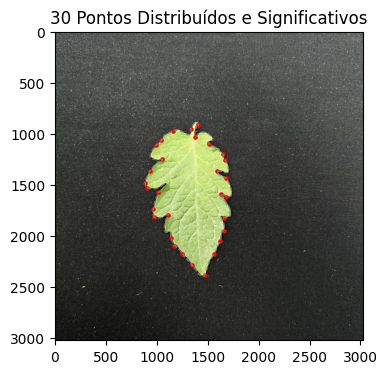

In [31]:
def significant_points(img, contour_closed, abs_curvature, num_points=100):
    N = len(contour_closed)
    step = N // num_points

    final_indices = []
    for i in range(num_points):
        start = i * step
        end = (i + 1) * step if i < num_points - 1 else N
        region_indices = range(start, end)
        best_idx = max(region_indices, key=lambda idx: abs_curvature[idx])
        final_indices.append(best_idx)

    final_points = contour_closed[final_indices]

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.plot(contour_closed[:, 0], contour_closed[:, 1], '--', color='gray', lw=1, alpha=0.8)
    plt.scatter(final_points[:, 0], final_points[:, 1], c='red', s=5, marker='o')
    plt.title(f'{num_points} Pontos Distribu√≠dos e Significativos')
    plt.show()

significant_points(img, contour_closed, abs_curvature, num_points=30)

## <span style="color:; background-color:#854a8f;"> Modelo 3D</span>

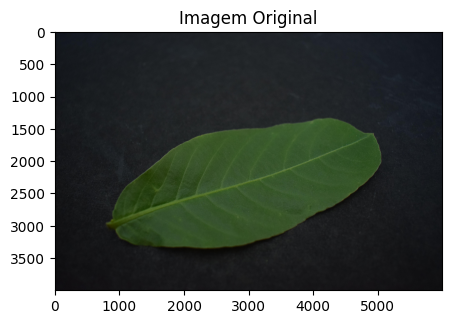

In [32]:
url = "https://raw.githubusercontent.com/mateuskrause/tp-aln/main/DATASET/exemplar_01.JPG"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("Imagem Original")
plt.show()

Convertendo a imagem para o espa√ßo de cor HSV e segmentando regi√µes verdes, como anteriormente.

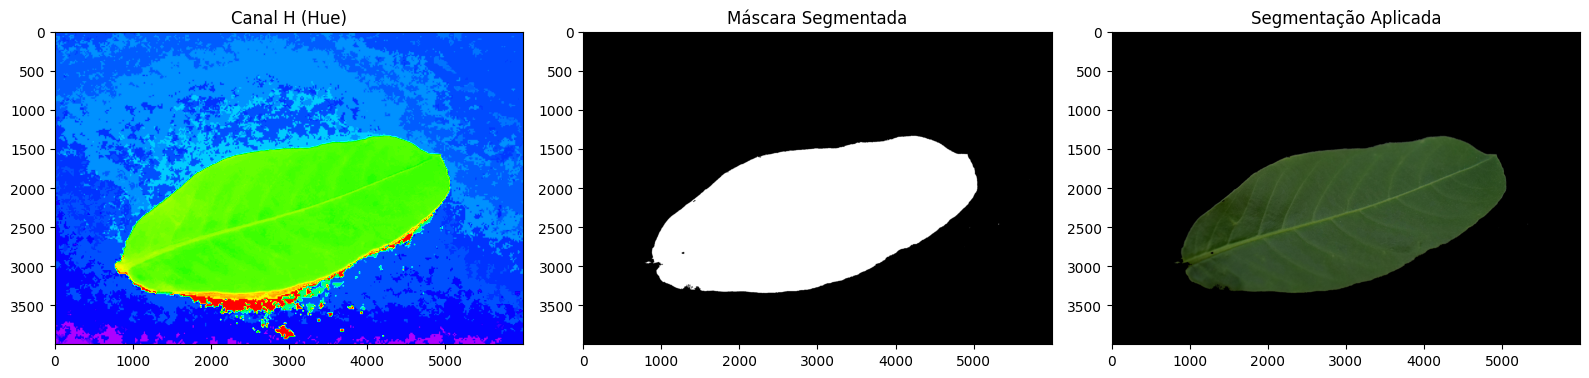

In [33]:
# HSV e m√°scara
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_green = np.array([40, 50, 50])
upper_green = np.array([100, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# Limpeza da m√°scara
kernel = np.ones((5, 5), np.uint8)
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Aplicar m√°scara
masked_img = cv2.bitwise_and(img, img, mask=mask_cleaned)

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(hsv[:, :, 0], cmap='hsv')
axs[0].set_title("Canal H (Hue)")
axs[1].imshow(mask_cleaned, cmap='gray')
axs[1].set_title("M√°scara Segmentada")
axs[2].imshow(masked_img)
axs[2].set_title("Segmenta√ß√£o Aplicada")
plt.tight_layout()
plt.show()

Aplicamos o MiDaS (**M**ulti-**D**epth **A**ware **S**ynthesis), que √© um modelo de aprendizado profundo desenvolvido para estimar mapas de profundidade monoculares ‚Äî isto √©, profundidade relativa da cena apenas a partir de uma imagem 2D. Ele gera uma imagem em escala de cinza, onde cada pixel indica a profundidade relativa (quanto menor, mais perto).


Using cache found in C:\Users\nbbri/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\nbbri/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master
Using cache found in C:\Users\nbbri/.cache\torch\hub\intel-isl_MiDaS_master


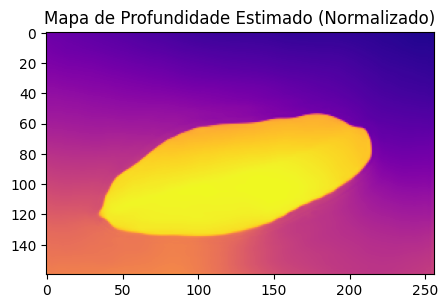

In [34]:
import torch

# Carregar modelo MiDaS e transforma√ß√µes
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
transforms = torch.hub.load("intel-isl/MiDaS", "transforms").small_transform

# Configurar dispositivo (GPU se dispon√≠vel)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
midas.to(device).eval()

# Transformar e enviar imagem para dispositivo
inp = transforms(img).to(device)

with torch.no_grad():
    pred = midas(inp)

# Extrair profundidade e normalizar
depth = pred.squeeze().cpu().numpy()
dmin, dmax = depth.min(), depth.max()
depth_n = (depth - dmin) / (dmax - dmin)

# Visualizar mapa de profundidade normalizado
plt.figure(figsize=(5,5))
plt.imshow(depth_n, cmap='plasma')
plt.title("Mapa de Profundidade Estimado (Normalizado)")
plt.show()


ìáº O mapa de profundidade gerado por modelos como o MiDaS tem resolu√ß√£o diferente da imagem original, geralmente menor. Para aplicar a segmenta√ß√£o corretamente tamb√©m na profundidade, precisamos redimensionar a m√°scara da folha para o mesmo tamanho do mapa de profundidade.

ìáº Para identificar bordas precisas da folha na profundidade, extra√≠mos um "anel" na borda da m√°scara:

- Erode a m√°scara para reduzir sua √°rea.
- Subtrai a m√°scara erodida da original para obter um anel nas bordas.

Caso existam v√°rios an√©is, mantemos apenas o maior, que corresponde √† borda principal da folha.

ìáº Para identificar detalhes importantes na forma e na superf√≠cie da folha, aplicamos o detector de bordas Canny

Usamos dois pares de limiares diferentes para ajustar a sensibilidade :
- Na m√°scara 2D: limiares mais altos (100‚Äì200), pois a imagem √© limpa
- No mapa de profundidade: limiares mais baixos (50‚Äì150), para captar varia√ß√µes suaves

ìáº Ap√≥s detectar as bordas, aplicamos a m√°scara do anel da borda para filtrar apenas as bordas pr√≥ximas ao contorno da folha. 

ìáº Em seguida, calculamos o gradiente da profundidade na regi√£o do anel para detectar onde h√° mudan√ßas significativas. Ooperador de Sobel, que estima a varia√ß√£o da profundidade nas dire√ß√µes horizontal (grad_x) e vertical (grad_y). A partir desses dois componentes, obtemos a magnitude do gradiente, que representa a intensidade da mudan√ßa de relevo em cada ponto da folha.

Enquanto **Canny** detecta bordas bem definidas, **gradientes** capturam:
- *Mudan√ßas gradativas*: Transi√ß√µes suaves mas significativas
- *Intensidade quantitativa*: N√£o apenas presen√ßa, mas magnitude da mudan√ßa
- *Sensibilidade ajust√°vel*: Limiar pode ser otimizado para cada aplica√ß√£o

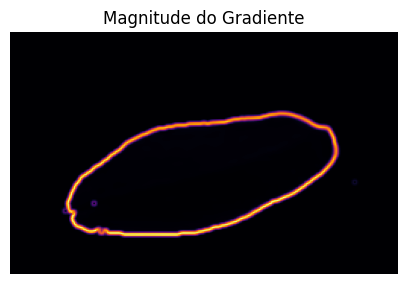

In [35]:
# Redimensionar a m√°scara para o tamanho do mapa de profundidade
h, w = depth_n.shape
mask_down = cv2.resize(mask_cleaned.astype(np.uint8), (w,h), interpolation=cv2.INTER_NEAREST)

# Normalizar m√°scara para valores entre 0 e 1
mask_f = mask_down.astype(np.float32) / 255.0
# Aplicar m√°scara no mapa de profundidade
depth_leaf = depth_n * mask_f

# Eros√£o para criar anel
eroded = cv2.erode(mask_down, np.ones((4,4), np.uint8))

# Anel = m√°scara original menos erodida
rim = ((mask_down - eroded) > 0).astype(np.uint8)

# Encontrar contornos do anel
contours, _ = cv2.findContours(rim, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) > 0:
    # Maior contorno
    largest_contour = max(contours, key=cv2.contourArea)
    rim_largest = np.zeros_like(rim)
    cv2.drawContours(rim_largest, [largest_contour], -1, 1, thickness=cv2.FILLED)

    eroded_largest = cv2.erode(rim_largest, np.ones((7,7), np.uint8))
    rim = ((rim_largest - eroded_largest) > 0).astype(np.uint8)

# Detector Canny na m√°scara downsized para bordas
edges_mask = cv2.Canny(mask_down, 100, 200)

# Detector Canny no mapa de profundidade para bordas
depth_uint8 = np.uint8(depth_leaf * 255)
edges_depth = cv2.Canny(depth_uint8, 50, 150)

# Filtrar bordas para a regi√£o do anel
edges_ring = cv2.bitwise_and(edges_depth, edges_depth, mask=rim.astype(np.uint8))

grad_x = cv2.Sobel(depth_leaf, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(depth_leaf, cv2.CV_64F, 0, 1, ksize=5)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

th = 0.04
dges = ((grad_mag > th) & (rim > 0))

# Visualiza√ß√£o
plt.figure(figsize=(5, 5))
plt.imshow(grad_mag, cmap='inferno')
plt.title("Magnitude do Gradiente")
plt.axis('off')
plt.show()

Assim, rendedizando a superf√≠cie 3D da folha com a borda detectada sobreposta, temos algo impreciso.


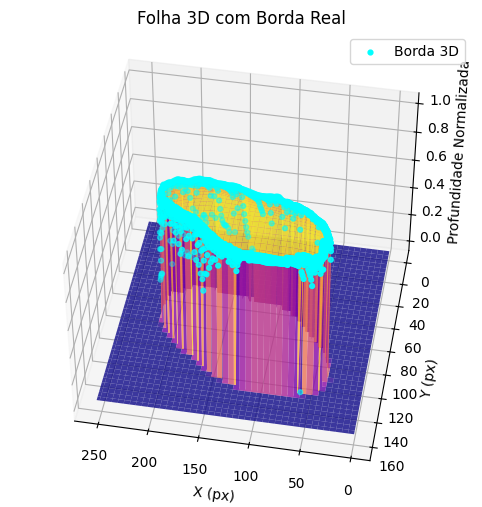

In [36]:
from mpl_toolkits.mplot3d import Axes3D

ys, xs = np.where(dges)
zs = depth_leaf[ys, xs]

h, w = depth_leaf.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h))
Z = depth_leaf

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.8)
ax.scatter(xs, ys, zs, color='cyan', s=12, label='Borda 3D')
ax.set_title('Folha 3D com Borda Real')
ax.set_xlabel('X (px)')
ax.set_ylabel('Y (px)')
ax.set_zlabel('Profundidade Normalizada')
ax.view_init(elev=45, azim=100)
ax.legend()
plt.show()


Calculamos o esqueleto da borda e extra√≠mos os pontos de maior curvatura como candidatos a v√©rtices da folha.

(A **esqueletoniza√ß√£o** transforma uma regi√£o bin√°ria 2D em um conjunto de linhas 1D que mant√©m a topologia da forma original. Cada ponto do esqueleto √©, por defini√ß√£o, aproximadamente equidistante de duas bordas da forma)

Utilizamos **KMeans** para agrupar os pontos do esqueleto e selecionamos os pontos com maior curvatura em cada cluster.

In [37]:
from scipy.ndimage import gaussian_filter1d
from skimage.morphology import skeletonize

skeleton = skeletonize(rim > 0)
ys_sk, xs_sk = np.where(skeleton)
zs_sk = depth_leaf[ys_sk, xs_sk]

# Formar contorno do esqueleto
contour_sk = np.vstack([xs_sk, ys_sk]).T
contour_closed = np.vstack([contour_sk, contour_sk[0]])  # fechar para suavidade

# Fun√ß√£o de derivadas suavizadas
def smooth_derivative(signal, sigma=3.0):
    smoothed = gaussian_filter1d(signal, sigma, axis=0)
    grad = np.gradient(smoothed, axis=0)
    return grad

# Derivadas
dx = smooth_derivative(contour_closed[:, 0])
dy = smooth_derivative(contour_closed[:, 1])
d2x = smooth_derivative(dx)
d2y = smooth_derivative(dy)

# Curvatura (absoluta)
curvature = (dx * d2y - dy * d2x) / ((dx**2 + dy**2)**1.5 + 1e-10)
abs_curvature = np.abs(curvature[:-1])  # corresponde √† forma de contour_sk


c:\Users\nbbri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


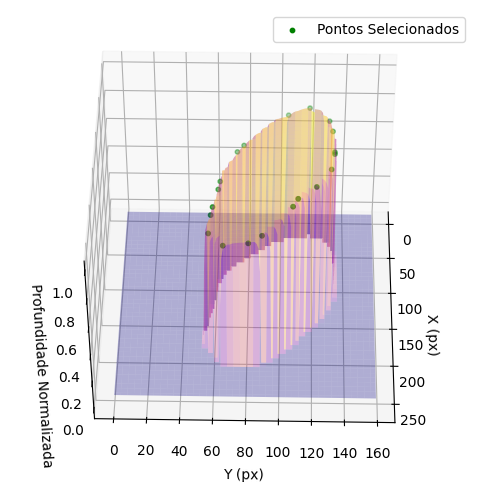

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def significant_points(num_points=20):
    # Usa vari√°veis do escopo global: contour_sk, abs_curvature, xs_sk, ys_sk, zs_sk, X, Y, Z
    n = min(num_points, len(xs_sk))
    kmeans = KMeans(n_clusters=n, random_state=42).fit(contour_sk)
    labels = kmeans.labels_

    final_indices = []
    for i in range(n):
        cluster_idxs = np.where(labels == i)[0]
        if len(cluster_idxs) == 0:
            continue
        best_idx = cluster_idxs[np.argmax(abs_curvature[cluster_idxs])]
        final_indices.append(best_idx)

    curv_points = contour_sk[final_indices]
    z_curv = zs_sk[final_indices]

    # Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.3)
    # ax.scatter(xs_sk, ys_sk, zs_sk, color='magenta', s=10, label='Skeleton')
    ax.scatter(curv_points[:, 0], curv_points[:, 1], z_curv, color='green', s=10, label='Pontos Selecionados')
    ax.set_xlabel('X (px)')
    ax.set_ylabel('Y (px)')
    ax.set_zlabel('Profundidade Normalizada')
    ax.view_init(elev=45, azim=1)
    ax.legend()
    plt.show()

    return curv_points, z_curv

curv_points, z_curv = significant_points(num_points=20)

Para conferir se est√° ok, projetamos os pontos de curvatura extra√≠dos no plano da imagem original.


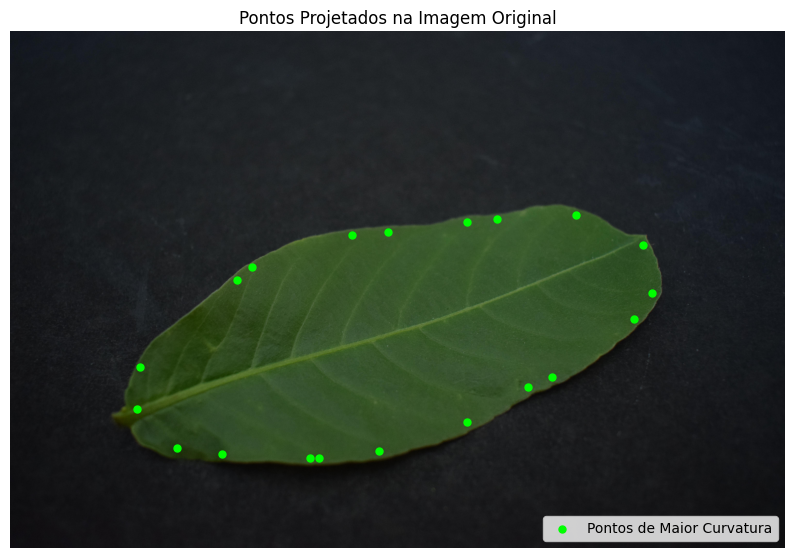

In [39]:
h_orig, w_orig = img.shape[:2]
scale_x = w_orig / w
scale_y = h_orig / h

x_img = curv_points[:, 0] * scale_x
y_img = curv_points[:, 1] * scale_y

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(x_img, y_img, c='lime', s=25, marker='o', label='Pontos de Maior Curvatura')
plt.axis('off')
plt.title("Pontos Projetados na Imagem Original")
plt.legend(loc='lower right')
plt.show()


# <span style="color:; background-color:OliveDrab;">  Interpola√ß√£o de Pontos </span>

Dados os pontos de interesse da folha, gostar√≠amos de obter uma forma de representar sua borda de forma param√©trica (isto √©, atrav√©s de um par√¢metro que varia em um certo intervalo). Essa abordagem √© interessante poins define uma representa√ß√£o cont√≠nua, que podemos posteriormente evaluar numa quantidade de pontos necess√°ria para o que gostar√≠amos de utilizar.

Para isso, utilizaremos B-splines, pois podemos obter representa√ß√µes precisas, que oferecem controle local sobre a curva e que garantem a continuidade entre segmentos.

## <span style="color:; background-color:DarkOrchid;"> B-Splines </span>

Essas curvas s√£o definidas como combina√ß√µes lineares de fun√ß√µes polinomiais por partes, e possuem tr√™s elementos principais:

- Conjunto de pontos de controle
- Grau polinomial
- Vetor de n√≥s

B-Splines n√£o necessariamente passam pelos pontos de controle, apenas as utilizam para definir sua forma.

Seja o vetor de n√≥s $T = \{t_0, t_1, \dots, t_m\}$, onde $T$ √© uma sequ√™ncia n√£o decrescente com $t_i \in [0, 1]$. Agora defina os pontos de controls $P_0, P_1, \dots, P_n$. Defina o grau como $p = m - n - 1$.

Agora defina a fun√ß√£o base como:
$$
N_{i,0}(t) =
\begin{cases}
1 \quad \text{se } t_i \leq t \leq t_{i+1} \\
0 \quad \text{caso contr√°rio}
\end{cases}
$$

$$
N_{i,j}(t) = \frac{t-t_i}{t_{i+j} - t_i} N_{i, j-1}(t) + \frac{t_{i+j+1} - t}{t_{i+j+1} - t_{j-1}} N_{i+1, j-1}(t)
$$

Onde $j = 1, 2, \dots, p$. Ent√£o a curva definida por
$$
C(t) = \sum_{i=0}^n P_i N_{i,p}(t)
$$
√© uma B-spline.


## <span style="color:Orchid; background-color:;"> Interpola√ß√£o com B-Splines </span>
Suponha que haja $ n+1 $ pontos $D_0, D_1, \dots, D_n$. Queremos encontrar uma B-spline de grau $p$, onde $p \leq n$, definida por $n+1$ pontos de controle que passa por todos pos pontos na ordem que s√£o definidos.

Esta B-spline possui $n+1$ pontos de controle desconhecidos. J√° que o par√¢metro $t_k$ corresponde ao ponto $D_k$, utilizando $t_k$ na equa√ß√£o $C(t) de uma B-spline, teremos o seguinte:
$$
D_k = C(t_k) = \sum_{i=0}^n N_{i, p}(t_k) P_i \quad 0 \leq k \leq n
$$

Podemos organizar os valores $N_{i, p}(t_k)$ em uma matriz $N$ de dimens√µes $(n+1) \times (n+1)$ onde a linha $k$ cont√©m os valores $N_{0,p}(u), N_{1,p}(u), \dots, N_{i,p}(u)$ evaluados em $t_k$:
$$
\mathbf{N} =
\begin{bmatrix}
N_{0,p}(t_0) & N_{1,p}(t_0) & N_{2,p}(t_0) & \cdots & N_{n,p}(t_0) \\
N_{0,p}(t_1) & N_{1,p}(t_1) & N_{2,p}(t_1) & \cdots & N_{n,p}(t_1) \\
\vdots       & \vdots       & \vdots       & \ddots & \vdots       \\
N_{0,p}(t_n) & N_{1,p}(t_n) & N_{2,p}(t_n) & \cdots & N_{n,p}(t_n)
\end{bmatrix}
$$

Vamos tamb√©m representar os vetores $D_k$ e $P_i$ em matrizes $D$ e $P$, onde $D_k$ √© um vetor no espa√ßo de dimens√£o $s$ e que aparece na linha $k$ da matriz $D$. De forma similar, $P_i$ √© um vetor no espa√ßo de dimens√£o $s$ que aparece na linha $i$ da matriz $P$. A dimens√£o $s$ √© a dimens√£o onde a spline est√° sendo evaluada. Temos:
$$
\mathbf{D} =
\begin{bmatrix}
d_{01} & d_{02} & d_{03} & \cdots & d_{0s} \\
d_{11} & d_{12} & d_{13} & \cdots & d_{1s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
d_{n1} & d_{n2} & d_{n3} & \cdots & d_{ns}
\end{bmatrix}
\qquad
\mathbf{P} =
\begin{bmatrix}
p_{01} & p_{02} & p_{03} & \cdots & p_{0s} \\
p_{11} & p_{12} & p_{13} & \cdots & p_{1s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
p_{n1} & p_{n2} & p_{n3} & \cdots & p_{ns}
\end{bmatrix}
$$

Dessa forma, podemos verificar que podemos representar o problema de intepola√ß√£o com a seguinte equa√ß√£o:
$$ D = N \cdot P$$

Como a matriz $D$ cont√©m os pontos de entrada e a matriz $N$ √© obtida evaluando as fun√ß√µes bases da B-spline nos par√¢metros dados, tanto $D$ quanto $N$ s√£o conhecidas, e a √∫nica matriz desconhecida √© $P$. Se solucionarmos a equa√ß√£o para $P$, obteremos os pontos de controle da B-spline que interpola os pontos, consequentemente obtendo a curva desejada.

## <span style="color:Orchid; background-color:;">  Resolvendo D = NP </span>

Resolveremos a equa√ß√£o coluna por coluna, obtendo assim um sistema linear. Sendo $d^i$ a i-√©sima coluna de $D$, e $p^i$ a i-√©sina coluna de $P$, teremos o seguinte sistema:
$$ d^i = N \cdot p^i$$

A matriz $N$ √© calculada utilizando a fun√ß√£o base da B-spline, utilizando o conjunto $T$ de n√≥s (n√£o confundir com o par√¢metro de interpola√ß√£o $t_k$). Esses n√≥s s√£o calculados de diversas formas, que ser√£o omitidas, por√©m uma explica√ß√£o mais detalhada pode ser encontrada [aqui](https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/INT-APP/PARA-knot-generation.html).

Resolvendo para $p^i$, teremos a i-√©sima coluna de $P$. Fazendo isso para cada coluna, teremos a matriz $P$ completa e todos os pontos de controle ser√£o computados.

## <span style="color:Orchid; background-color:;">  Obtendo uma B-spline fechada e cont√≠nua </span>


No caso de uma B-spline fechada e cont√≠nua (ou seja, peri√≥dica), o sistema linear muda porque precisamos garantir que a curva passe por todos os pontos dados, seja suave e feche perfeitamente (o in√≠cio e fim coincidem e suas derivadas tamb√©m).

Para isso, repetiremos o ponto inicial no fim do vetor de pontos, para garantir que a curva seja fechada, e modificaremos o algoritmo que calcula os n√≥s, para que garanta a continuidade neces√°ria.

*Inserir aqui uma explica√ß√£o sobre como os n√≥s s√£o calculados.*

### Escrevendo sobre a representa√ß√£o matricial

*Aqui direi finalmente como a matriz de banda aparece*

## <span style="color:; background-color:DarkOrchid;"> Woodbury </span>

Na constru√ß√£o de splines peri√≥dicos, particularmente B-splines de grau $k$, o sistema linear resultante apresenta uma matriz de coeficientes originalmente banda, com largura $2b + 1$ (onde $b = \lfloor k/2 \rfloor$). Contudo, as condi√ß√µes de periodicidade introduzem termos adicionais que conectam as extremidades da matriz, modificando especificamente os cantos de $A$: os blocos superior-direito e inferior-esquerdo, originalmente nulos, passam a conter valores n√£o-nulos, que garantem a continuidade peri√≥dica. Essas modifica√ß√µes afetam apenas $r = k - 1$ linhas e colunas, caracterizando uma corre√ß√£o de baixo posto.

Assim, a matriz total pode ent√£o ser escrita como: $\tilde{A} = A + U V^T$, onde
- $A \in \mathbb{R}^{n \times n}$: matriz banda de largura $2b + 1$, com $b = \lfloor k/2 \rfloor$;
- $U, V \in \mathbb{R}^{n \times r}$: matrizes que representam a modifica√ß√£o peri√≥dica localizada nos cantos, com $r = k - 1$;
- $U V^T$: termo de corre√ß√£o de baixa patente (low-rank), respons√°vel por conectar as extremidades da matriz e garantir a periodicidade.

Resolver diretamente o sistema linear $\tilde{A} x = b$ seria computacionalmente custoso, pois $\tilde{A}$ perde a estrutura esparsa de $A$ e se torna densa. Enquanto sistemas com matrizes banda podem ser resolvidos eficientemente em $O(n w^2)$ (onde $w \approx k$ √© a largura de banda), m√©todos diretos para matrizes densas exigem $O(n^3)$ opera√ß√µes. No caso de B-splines, onde $w \approx k$, a estrutura banda permite efici√™ncia, mas a adi√ß√£o do termo $U V^T$ destr√≥i essa esparsidade.

No entanto, felizmente, a estrutura espec√≠fica de $\tilde{A}$, isto √©, uma matriz banda mais uma corre√ß√£o de baixo posto, permite utilizar a f√≥rmula de Sherman-Morrison para resolver o sistema de forma eficiente, evitando a invers√£o direta de $\tilde{A}$ e mantendo o custo computacional controlado, pr√≥ximo de $O(n w^2)$.

## <span style="color:Orchid; background-color:;"> Algoritmo de Woodbury </span>

O algoritmo de Woodbury √© uma aplica√ß√£o pr√°tica da identidade de Woodbury, que por sua vez √© a forma matricial em blocos da f√≥rmula de Sherman‚ÄìMorrison. Essa identidade generaliza a invers√£o de uma matriz que foi perturbada por um termo low-rank.

Ela permite inverter matrizes densas da forma $A + UCV^T$, onde 
- $A \in \mathbb{R}^{n \times n}$ √© uma matriz invert√≠vel (geralmente esparsa ou com estrutura de banda),

- $U \in \mathbb{R}^{n \times r}$ e $V \in \mathbb{R}^{n \times r}$ s√£o matrizes que definem a corre√ß√£o de baixo posto,

- $C \in \mathbb{R}^{r \times r}$ √© uma matriz pequena, tamb√©m invert√≠vel,

- $r \ll n$, ou seja, a corre√ß√£o tem posto muito menor do que a dimens√£o do sistema.

A f√≥rmula estabelece que $ (A + UCV^T)^{-1} = A^{-1} - A^{-1}U(C^{-1} + V^T A^{-1} U)^{-1} V^T A^{-1} $

A vatange √© que se  $A$ √© f√°cil de inverter (por ser esparsa, diagonal ou, no nosso caso, banda), a f√≥rmula evita a invers√£o direta da matriz densa. Ainda, $UV^T$ tem posto pequeno, e o c√°lculo de $\left(I + V^T A^{-1} U\right)^{-1}$ envolve apenas uma matriz pequena de dimens√£o $r \times r$.


A ideia do algoritmo consiste em quatro passos principais: (1) resolver sistemas banda para pr√©-condicionar a corre√ß√£o, (2) computar uma pequena matriz de ajuste, (3) resolver o sistema banda original e (4) combinar os resultados para obter a solu√ß√£o final. 

<span style="color:; background-color:MediumOrchid;"> **Passo 1:</span> Resolver sistemas lineares banda $AZ = U$**.
- Para cada coluna $u_i$ da matriz $U \in \mathbb{R}^{n \times r}$, resolve-se o sistema linear banda: $Az_i = u_i $
- Os vetores solu√ß√£o $z_i$ formam as colunas da matriz $Z \in \mathbb{R}^{n \times r}$. Como $A$ √© banda, esta opera√ß√£o √© computacionalmente eficiente ($\mathcal{O}(n)$ para larguras de banda fixas).

<span style="color:; background-color:MediumOrchid;">**Passo 2:</span> Calcular a matriz de corre√ß√£o $H = (I + V^TZ)^{-1}$**
<br> Calcula-se:
- O produto $V^TZ \in \mathbb{R}^{r \times r}$ (custo $\mathcal{O}(n r^2)$)
- Soma com a identidade: $I + V^TZ$
- Invers√£o desta matriz pequena: $H = (I + V^TZ)^{-1}$ (custo $\mathcal{O}(r^3)$)

<span style="color:; background-color:MediumOrchid;">**Passo 3:</span> Resolver o sistema banda $Ay = b$**
- Resolve-se o sistema linear original (ignorando a corre√ß√£o): $Ay=b$
- Esta solu√ß√£o $y$ seria exata se $UV^T = 0$.

<span style="color:; background-color:MediumOrchid;">**Passo 4:</span> Calcular a solu√ß√£o final $c = y - ZH(V^Ty)$**
<br> Calcula-se:
- A proje√ß√£o $V^Ty \in \mathbb{R}^r$ (custo $\mathcal{O}(n r)$)
- Aplica-se a corre√ß√£o: $H(V^Ty)$
- Espalha-se a corre√ß√£o: $ZH(V^Ty) \in \mathbb{R}^n$
- Obt√©m-se a solu√ß√£o final: $c = y - ZH(V^Ty)$

O vetor $c$ √© a solu√ß√£o exata do sistema $(A + UV^T)c = b$.


#### <span style="color:Orchid; background-color:;"> Estabilidade e Complexidade </span>

A complexidade computacional do algoritmo √© $O(nw¬≤ + r¬≥)$, onde:

- $O(nw^2)$ vem da resolu√ß√£o dos sistemas com a matriz banda $A$. Essa matriz possui largura de banda $w$ (n√∫mero de diagonais n√£o nulas), o que permite *<span style="color:LightSeaGreen; background-color:;"> elimina√ß√£o gaussiana adaptada<span>* *. Cada opera√ß√£o elementar nessa elimina√ß√£o envolve $O(w^2)$ opera√ß√µes (pois lida apenas com blocos pequenos), repetidas $n$ vezes (n√∫mero de equa√ß√µes do sistema), mantendo-se $w$ fixo. Como $w \ll n$, o custo √© linear em $n$.

- $O(r^3)$ corresponde √† invers√£o da matriz densa $r \times r$, $(I + V^\top A^{-1} U)$, onde $r = \text{rank}(UV^\top) = k - 1$. Como essa matriz √© densa, mas de baixa dimens√£o, e $k$ (grau do B-spline) √© pequeno na pr√°tica (tipicamente $k = 3$ ou $5$ para splines c√∫bicos ou quinticos), esse custo √© computacionalmente desprez√≠vel em rela√ß√£o ao termo dominante.

Al√©m da efici√™ncia, o m√©todo √© numericamente est√°vel: a invers√£o de A (bem-condicionada por ser banda) domina o processo, enquanto a corre√ß√£o de posto baixo $UV·µÄ$ introduz m√≠nima perturba√ß√£o, preservando a precis√£o.

#### * *<span style="color:LightSeaGreen; background-color:;"> Elimina√ß√£o Gaussiana Adaptada para Matrizes Banda<span>*

m um sistema linear geral $Ax = b$, onde $A \in \mathbb{R}^{n \times n}$, a elimina√ß√£o gaussiana cl√°ssica requer $O(n^3)$ opera√ß√µes para resolver o sistema ‚Äî isso ocorre porque cada etapa pode envolver combina√ß√µes de linhas completas, afetando a matriz inteira.

Por√©m, quando $A$ √© uma matriz banda, com largura de banda total $w = l + u + 1$ (sendo $l$ o n√∫mero de subdiagonais e $u$ o n√∫mero de superdiagonais), a situa√ß√£o muda drasticamente. A matriz banda tem uma forma onde a maior parte da matriz √© composta de zeros, exceto por uma faixa diagonal de largura $w$.

$A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1,u+1} & 0 & \cdots & 0 \\
a_{21} & a_{22} & \cdots & a_{2,u+2} & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & a_{n,n-l} & \cdots & \cdots & \cdots & a_{nn}
\end{pmatrix}$

Durante a elimina√ß√£o gaussiana, cada piv√¥ $a_{ii}$ afeta apenas as pr√≥ximas $l$ linhas e $u$ colunas. Como consequ√™ncia, cada etapa da elimina√ß√£o envolve apenas $O(w^2)$ opera√ß√µes (em vez de $O(n^2)$), e como h√° $n$ piv√¥s, o custo total √© $O(nw^2)$ 


# <span style="color:; background-color:OliveDrab;">  Aplica√ß√£o </span>